# Quora question pair analysis using Bag-of-Words with basic features

## Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import missingno as msno

In [ ]:
import re
from bs4 import BeautifulSoup


In [ ]:
print("All the required libraries are imported successfully!")

All the required libraries are imported successfully!


## Read the Dataset

In [ ]:
!unzip /content/drive/MyDrive/project/dataset.csv.zip

Archive:  /content/drive/MyDrive/project/dataset.csv.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.csv             


In [ ]:
url="/content/dataset.csv"
data=pd.read_csv(url)
print("Dataset is read successfully!")

Dataset is read successfully!


In [ ]:
print("The dataset of quora is given by: ")
data.head()

The dataset of quora is given by: 


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Details of the dataset

### 1. No of rows and columns

In [ ]:
rows=data.shape[0]
columns=data.shape[1]

print("The total number of rows in the above dataset is: ",rows)


print("\n The total number of columns in the above dataset is: ",columns)


shape=data.shape
print("\nTherefore, the shape of the dataset is: ")
print(shape)

The total number of rows in the above dataset is:  404290

 The total number of columns in the above dataset is:  6

Therefore, the shape of the dataset is: 
(404290, 6)


### 2. Name of the columns 

In [ ]:
col_names=data.columns.values                   
print("Indexes of the dataset: \n \n", col_names)

Indexes of the dataset: 
 
 ['id' 'qid1' 'qid2' 'question1' 'question2' 'is_duplicate']


### 3.Datatypes 

In [ ]:
print("The information of the given dataset is given by: \n")
data.info()


The information of the given dataset is given by: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### 4. Null value

In [ ]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

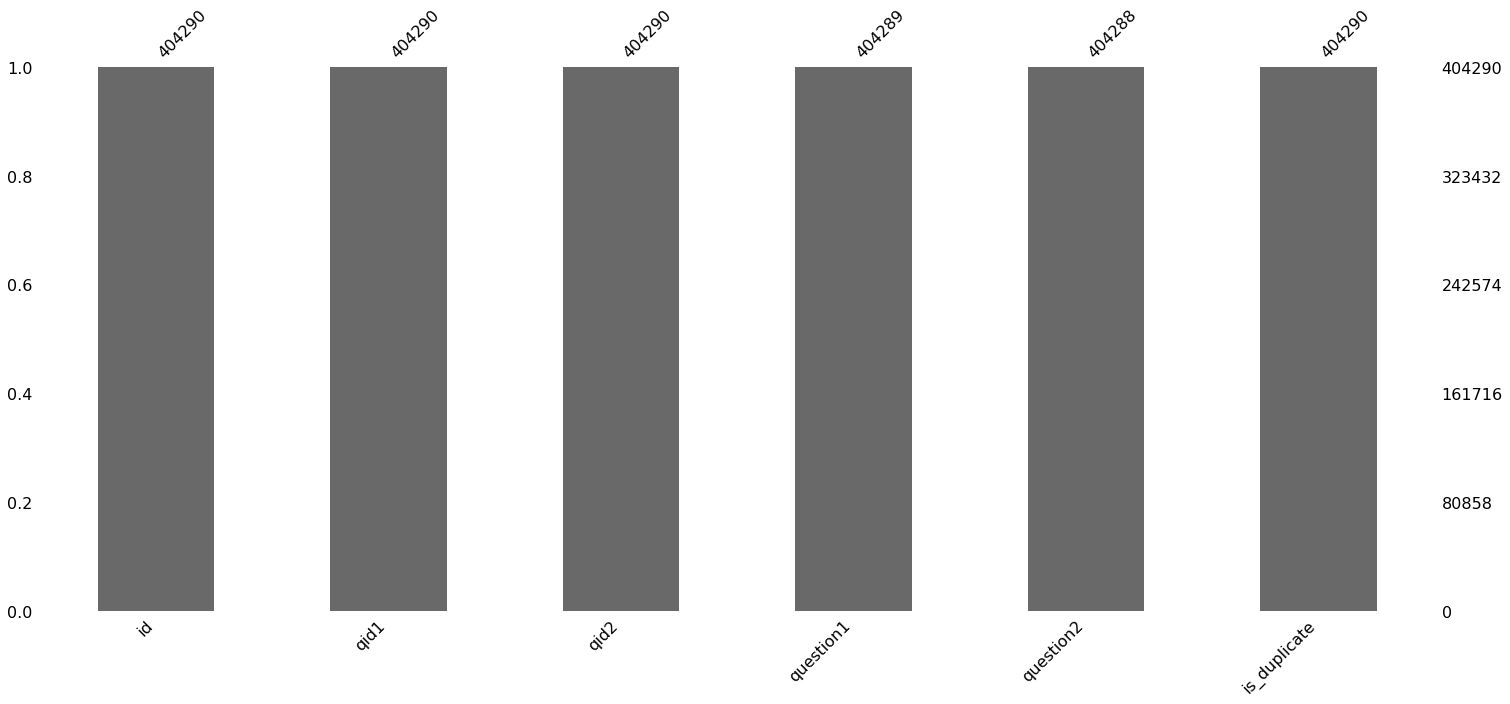

In [ ]:
msno.bar(data)
plt.show()

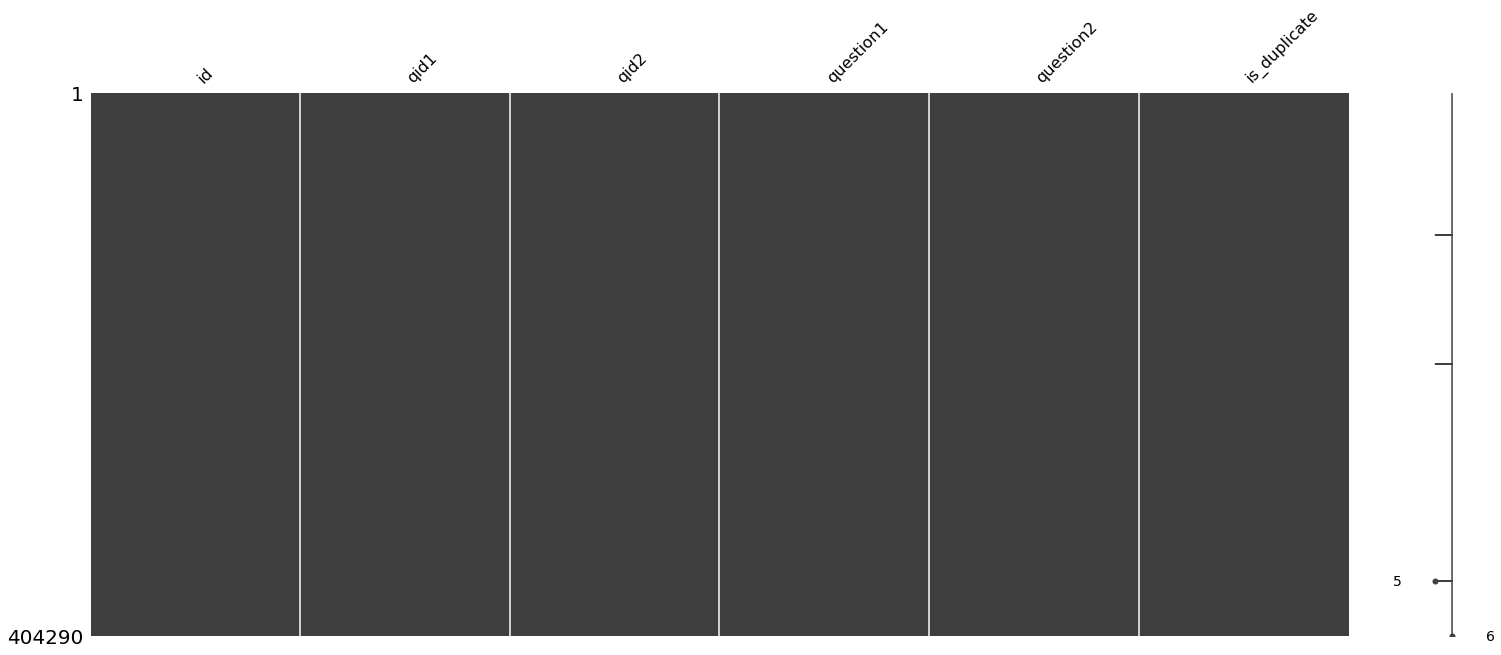

In [ ]:
msno.matrix(data)
plt.show()

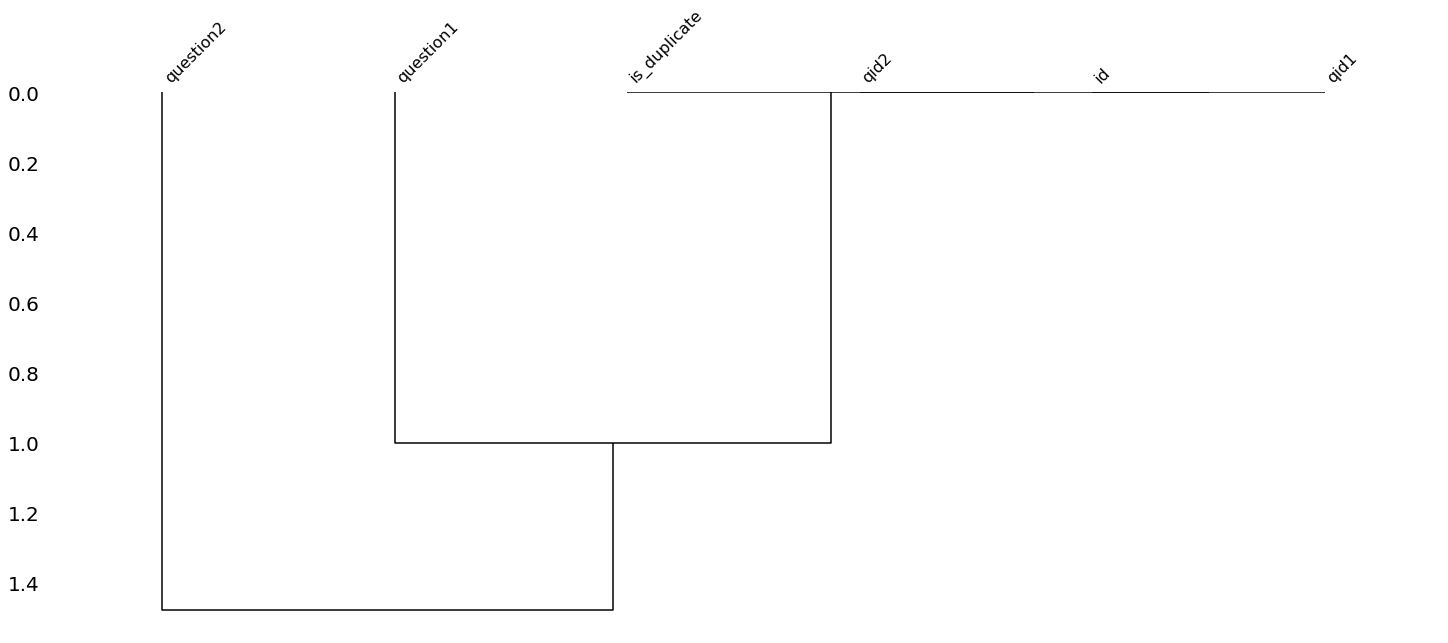

In [ ]:
msno.dendrogram(data)
plt.show()

# Analysis using BoW without Preprocessing i.e BoW with basic features 

## 1. EDA

### 1.Duplicate Rows

In [ ]:
data.duplicated().sum()

0

### 2.Distribution of duplicate and non duplicate questions





In [ ]:
tol=data["is_duplicate"].value_counts()
tol_1=data["is_duplicate"].count()
per=(tol/tol_1)*100

In [ ]:
print("The total of duplicate and non duplicate values are: \n")
print(tol)

The total of duplicate and non duplicate values are: 

0    255027
1    149263
Name: is_duplicate, dtype: int64


In [ ]:
print("The percentage of duplicate and non duplicate values are: \n")
print(per)

The percentage of duplicate and non duplicate values are: 

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


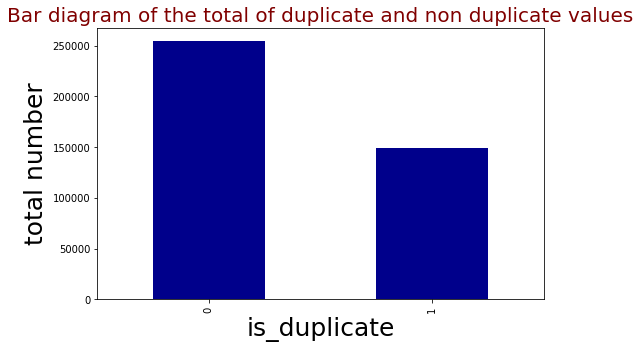

In [ ]:
tol.plot(kind= "bar", 
       figsize =(8,5),
       color= "darkblue",
       width=0.5
      )

plt.title("Bar diagram of the total of duplicate and non duplicate values" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("is_duplicate",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

##### Here we can see that the given dataset is not balanced and it is biased towards class 0.

### 3.Repeated questions

In [ ]:
qid=pd.Series(data["qid1"].tolist()+data["qid2"].tolist())
un=np.unique(qid).shape[0]
x=qid.value_counts()>1

#### A. Table

In [ ]:
print("Number of unique questions:   ", un)
print("Number of questions getting repeated:  ",x[x].shape[0])

Number of unique questions:    537933
Number of questions getting repeated:   111780


#### B.Histogram

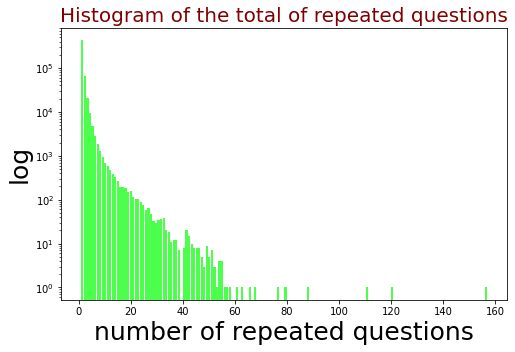

In [ ]:
plt.figure(figsize=[8,5])
plt.hist(x=qid.value_counts().values,
         bins=160,
         color='#00FF00',
         alpha=0.7, 
         rwidth=0.85)
        
plt.yscale('log')

plt.title("Histogram of the total of repeated questions" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("number of repeated questions",
            size = 25
          )

plt.ylabel("log",
           size=25
          )

plt.show()

## BASIC FEATURES: (before cleening)

Let's now construct a few features like:

*   **qs1_len** = Length of question1	
*   **qs2_len** = Length of question2
*   **qs1_num_words** = Number of words in Question 1
*   **q2_num_words** = Number of words in Question 2
*   **word_Common** = (Number of common unique words in Question 1 and Question 2)
*  **word_Total** =(Total num of words in Question 1 + Total num of words in Question 2)
*   **word_share** = (word_common)/(word_Total)








## 2. Features Engineering 

In [ ]:
new_data=data.sample(30000,random_state=2)

In [ ]:
print("New sampled data is selected successfully!! ")

New sampled data is selected successfully!! 


In [ ]:
print("The new Sampled data is given by: ")
new_data.head(10)

The new Sampled data is given by: 


,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0
244531,244531,145041,264664,I killed a snake on a Friday. There's a belief...,Do snakes really take revenge?,0
16633,16633,31698,31699,Is the royal family a net gain or a net loss t...,Why does the British royal family think it's O...,0
396316,396316,529365,529366,If a huge asteroid was about to hit Earth in X...,A 100-mile-wide asteroid is projected to hit E...,0
399493,399493,532771,456968,What would happen if a woman took Viagra?,Does Viagra really work?,0
15268,15268,29183,29184,How could I improve my love to my girlfriend?,How do I improve my relationship with my girlf...,0


### 1. Length of the questions calculation

In [ ]:
new_data["qs1_len"]=new_data["question1"].str.len()
new_data["qs2_len"]=new_data["question2"].str.len()


In [ ]:
print("After adding 2 new columns the dataset looks like: ")
new_data.head()

After adding 2 new columns the dataset looks like: 


,id,qid1,qid2,question1,question2,is_duplicate,qs1_len,qs2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


### 2. Number of words in the questions calculation

In [ ]:
new_data["qs1_num_words"]=new_data["question1"].apply(lambda row: len(row.split(" ")))
new_data["qs2_num_words"]=new_data["question2"].apply(lambda row: len(row.split(" ")))

In [ ]:
print("After adding another 2 new columns the dataset looks like: ")
new_data.head()

After adding another 2 new columns the dataset looks like: 


,id,qid1,qid2,question1,question2,is_duplicate,qs1_len,qs2_len,qs1_num_words,qs2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


### 3. Number of common words calculations 

In [ ]:
def common_words(row):
    wd1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    wd2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(wd1 & wd2)

In [ ]:
new_data['word_common'] = new_data.apply(common_words, axis=1)
print("After adding another one new column the dataset looks like: ")
new_data.head()


After adding another one new column the dataset looks like: 


,id,qid1,qid2,question1,question2,is_duplicate,qs1_len,qs2_len,qs1_num_words,qs2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


### 4. Total number of words( Question1 + Question2 ) calculation

In [ ]:
def total_words(row):
  wd1=set(map(lambda word: word.lower().strip(), row["question1"].split()))
  wd2=set(map(lambda word: word.lower().strip(), row["question2"].split()))
  return(len(wd1)+len(wd2))

In [ ]:
new_data['word_total'] = new_data.apply(total_words, axis=1)
print("After adding another one new column the dataset looks like: ")
new_data.head()

After adding another one new column the dataset looks like: 


,id,qid1,qid2,question1,question2,is_duplicate,qs1_len,qs2_len,qs1_num_words,qs2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


### 5. Percentage of common words calculation

In [ ]:
new_data["word_share"]=round(new_data['word_common']/new_data['word_total'],2)
print("After adding another one new column the dataset looks like: ")
new_data.head()

After adding another one new column the dataset looks like: 


,id,qid1,qid2,question1,question2,is_duplicate,qs1_len,qs2_len,qs1_num_words,qs2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


### Analysis of features

### 1.Qs1_len

In [ ]:
print("Basic summary of qs1_len")
print("Minimum characters : ", new_data['qs1_len'].min())
print("Maximum characters : ", new_data['qs1_len'].max())
print("Average characters : ", int(new_data['qs1_len'].mean()))

Basic summary of qs1_len
Minimum characters :  2
Maximum characters :  391
Average characters :  59


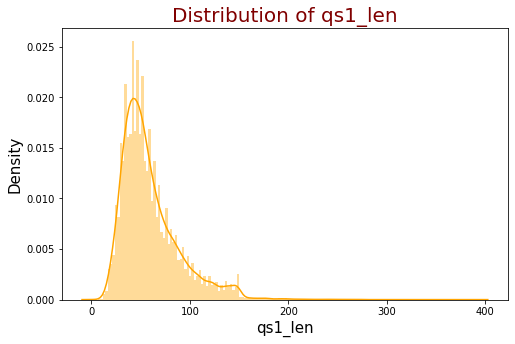

In [ ]:
plt.figure(figsize=[8,5])
sns.distplot(new_data['qs1_len'],
             bins=160,
             hist=True,
             kde=True,
             color="orange")

plt.title("Distribution of qs1_len" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("qs1_len",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()         

                        

### 2. Qs2_len

In [ ]:
print("Basic summary of qs2_len")
print("Minimum characters : ", new_data['qs2_len'].min())
print("Maximum characters : ", new_data['qs2_len'].max())
print("Average characters : ", int(new_data['qs2_len'].mean()))

Basic summary of qs2_len
Minimum characters :  6
Maximum characters :  1151
Average characters :  60


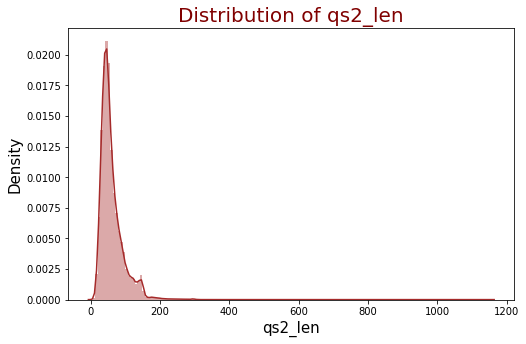

In [ ]:
plt.figure(figsize=[8,5])
sns.distplot(new_data['qs2_len'],
             bins=160,
             hist=True,
             kde=True,
             color="brown")

plt.title("Distribution of qs2_len" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("qs2_len",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()         

                                     
                                    

### 3.Qs1_num_words

In [ ]:
print("Basic summary of qs1_num_words")
print("Minimum characters : ", new_data['qs1_num_words'].min())
print("Maximum characters : ", new_data['qs1_num_words'].max())
print("Average characters : ", int(new_data['qs1_num_words'].mean()))

Basic summary of qs1_num_words
Minimum characters :  1
Maximum characters :  72
Average characters :  10


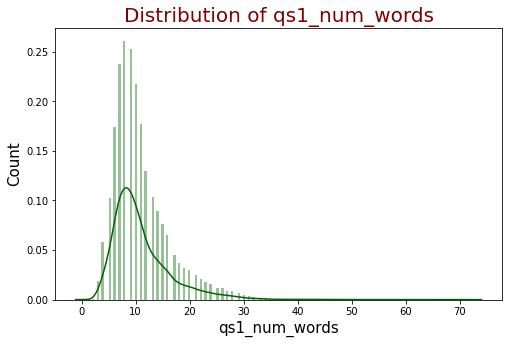

In [ ]:
plt.figure(figsize=[8,5])
sns.distplot(new_data['qs1_num_words'],
             bins=160,
             hist=True,
             kde=True,
             color="darkgreen")

plt.title("Distribution of qs1_num_words" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("qs1_num_words",
            size = 15
          )

plt.ylabel("Count",
           size=15
          )


plt.show()         

                        

### 4. Qs2_num_words

In [ ]:
print("Basic summary of qs2_num_words")
print("Minimum characters : ", new_data['qs2_num_words'].min())
print("Maximum characters : ", new_data['qs2_num_words'].max())
print("Average characters : ", int(new_data['qs2_num_words'].mean()))

Basic summary of qs2_num_words
Minimum characters :  1
Maximum characters :  237
Average characters :  11


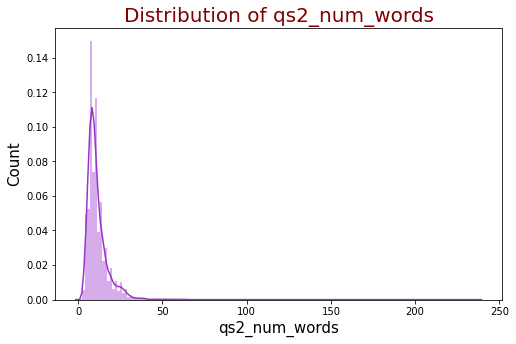

In [ ]:
plt.figure(figsize=[8,5])
sns.distplot(new_data['qs2_num_words'],
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of qs2_num_words" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("qs2_num_words",
            size = 15
          )

plt.ylabel("Count",
           size=15
          )


plt.show()         

                        

### 5. Common words

In [ ]:
print("Basic summary of word_common")
print("Minimum characters : ", new_data['word_common'].min())
print("Maximum characters : ", new_data['word_common'].max())
print("Average characters : ", int(new_data['word_common'].mean()))

Basic summary of word_common
Minimum characters :  0
Maximum characters :  38
Average characters :  4


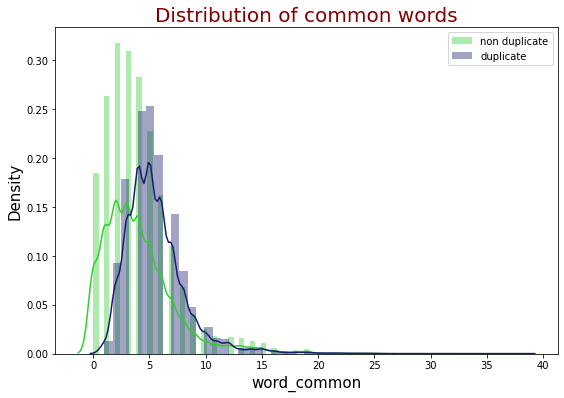

In [ ]:
plt.figure(figsize=(9,6))

sns.distplot(new_data[new_data["is_duplicate"]==0]["word_common"], 
             label="non duplicate",
             color="limegreen")

sns.distplot(new_data[new_data["is_duplicate"]==1]["word_common"], 
             label="duplicate",
             color="midnightblue")

plt.legend()

plt.title("Distribution of common words" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("word_common",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()         


### 6. Word total

In [ ]:
print("Basic summary of word_total")
print("Minimum characters : ", new_data['word_total'].min())
print("Maximum characters : ", new_data['word_total'].max())
print("Average characters : ", int(new_data['word_total'].mean()))

Basic summary of word_total
Minimum characters :  4
Maximum characters :  139
Average characters :  21


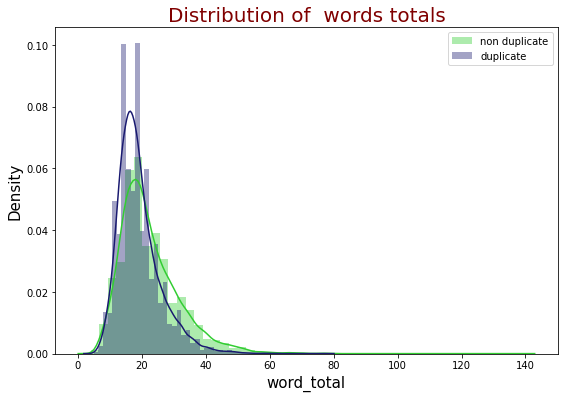

In [ ]:
plt.figure(figsize=(9,6))

sns.distplot(new_data[new_data["is_duplicate"]==0]["word_total"], 
             label="non duplicate",
             color="limegreen")

sns.distplot(new_data[new_data["is_duplicate"]==1]["word_total"], 
             label="duplicate",
             color="midnightblue")

plt.legend()

plt.title("Distribution of  words totals" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("word_total",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()       

### 7. word share

In [ ]:
print("Basic summary of word_share")
print("Minimum characters : ", new_data['word_share'].min())
print("Maximum characters : ", new_data['word_share'].max())
print("Average characters : ", int(new_data['word_share'].mean()))

Basic summary of word_share
Minimum characters :  0.0
Maximum characters :  0.5
Average characters :  0


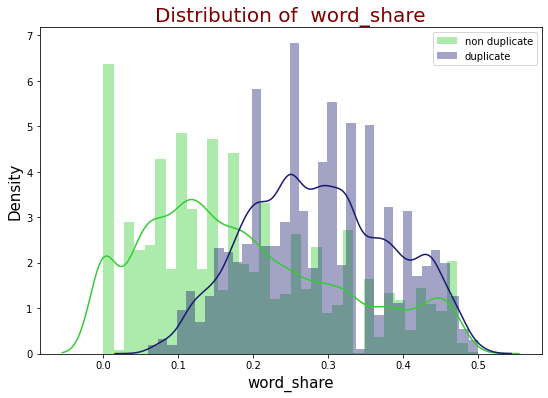

In [ ]:
plt.figure(figsize=(9,6))

sns.distplot(new_data[new_data["is_duplicate"]==0]["word_share"], 
             label="non duplicate",
             color="limegreen")

sns.distplot(new_data[new_data["is_duplicate"]==1]["word_share"], 
             label="duplicate",
             color="midnightblue")

plt.legend()

plt.title("Distribution of  word_share" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("word_share",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()       

## Dataset splitting

#### Spliting the above dataset into two datasets one is question dataset which contains question1 and question2 and the another is numeric dataset which contains is_duplicate, qs1_len, qs2_len, qs1_num_words, qs2_num_words, word_common, word_total, word_share.

In [ ]:
qs_data=new_data[["question1" ,	"question2"]]
num_data=new_data[["is_duplicate" ,	"qs1_len" ,	"qs2_len" ,	"qs1_num_words" ,	"qs2_num_words" ,	"word_common" ,	"word_total" ,	"word_share"]]

In [ ]:
print("The question dataset is given by: \n")
qs_data.head()

The question dataset is given by: 



,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:
print("The numeric dataset is given by: \n")
num_data.head()

The numeric dataset is given by: 



,is_duplicate,qs1_len,qs2_len,qs1_num_words,qs2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [ ]:
print("The shapes of the new 2 data frame is given by: \n")

print("Question dataset : ", qs_data.shape)

print("\nNumeric dataset: ", num_data.shape)

The shapes of the new 2 data frame is given by: 

Question dataset :  (30000, 2)

Numeric dataset:  (30000, 8)


## Text merging

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
questions=(list(qs_data["question1"])+list(qs_data["question2"]))
cove=CountVectorizer(max_features=3000)
qs1_array,qs2_array=np.vsplit(cove.fit_transform(questions).toarray(),2)

In [ ]:
df1=pd.DataFrame(qs1_array, index=qs_data.index)
df2=pd.DataFrame(qs2_array, index=qs_data.index)
temp_data=pd.concat([df1, df2], axis=1)

In [ ]:
print("The shape of the temporary dataset is : \n ")
temp_data.shape

The shape of the temporary dataset is : 
 


(30000, 6000)

In [ ]:
final_data=pd.concat([num_data,temp_data], axis=1)

In [ ]:
print("The final dataset is given by: \n")

final_data.head()

The final dataset is given by: 



,is_duplicate,qs1_len,qs2_len,qs1_num_words,qs2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("The shape of the final dataset is : \n ")
final_data.shape

The shape of the final dataset is : 
 


(30000, 6008)

## Model fitting And Prediction

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= final_data.iloc[:,1:].values  # it will select all rows but the first column will be excluded.
y=final_data.iloc[:,0].values    # # it will get column 0 as a SERIES of shape (n,) 

In [ ]:
X_train,X_test, y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnfcl= RandomForestClassifier()
rnfcl.fit(X_train, y_train)
y_pred=rnfcl.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print("The accuracy score of the random forest classfier is : ",acc)

The accuracy score of the random forest classfier is :  0.7682222222222223


In [ ]:
cnm=confusion_matrix(y_test,y_pred)
print("The confusion matrix of the random forest classfier is : \n ")
cnm

The confusion matrix of the random forest classfier is : 
 


array([[5061,  629],
       [1457, 1853]])

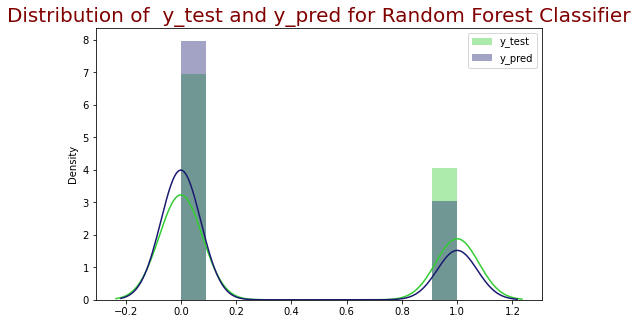

In [ ]:
plt.figure(figsize=(8,5))

sns.distplot(y_test, 
             label="y_test",
             color="limegreen")

sns.distplot(y_pred, 
             label="y_pred",
             color="midnightblue")

plt.legend()

plt.title("Distribution of  y_test and y_pred for Random Forest Classifier" ,
          size= 20,
          color="Maroon"
         )



plt.show()       

In [ ]:
sample = pd.DataFrame(y_pred,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,1


In [ ]:


mean_absolute_error(y_test,y_pred)


0.23177777777777778

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.48143304599682163

## XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbcl= XGBClassifier()
xgbcl.fit(X_train, y_train)
y_pred1=xgbcl.predict(X_test)
acc1= accuracy_score(y_test, y_pred1)
print("The accuracy score of the XGB classfier is : ",acc1)

The accuracy score of the XGB classfier is :  0.7355555555555555


In [ ]:
cnm1=confusion_matrix(y_test,y_pred)
print("The confusion matrix of the random forest classfier is : \n ")
cnm1

The confusion matrix of the random forest classfier is : 
 


array([[5061,  629],
       [1457, 1853]])

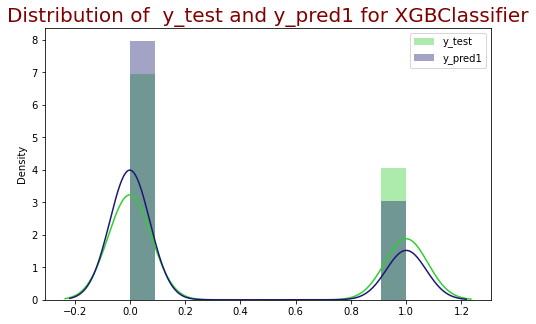

In [ ]:
plt.figure(figsize=(8,5))

sns.distplot(y_test, 
             label="y_test",
             color="limegreen")

sns.distplot(y_pred, 
             label="y_pred1",
             color="midnightblue")

plt.legend()

plt.title("Distribution of  y_test and y_pred1 for XGBClassifier" ,
          size= 20,
          color="Maroon"
         )



plt.show()     

In [ ]:
sample = pd.DataFrame(y_pred1,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,1,0
1,0,1
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,0,1


In [ ]:
mean_absolute_error(y_test,y_pred1)

0.2644444444444444

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred1))

0.514241620684717

#### From the above calculations we can see that the accuracy rate of Random Forest Classifier is 0.7682222222222223 and the accuracy rate of XGBClassifier is 0.7355555555555555. Therefore it is clear that the Random Forest Classifier  gives the  better accuracy rate than XGBClassifier. Therefore Random Forest Classfier is the better choice for this dataset. 